# ** plotting codon usage bias ** 

In [1]:
import json 
import random
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from datetime import datetime

In [2]:
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

get_aa_dict = {}#dictionary that turns codon into aa 
for key,value in SynonymousCodons.items(): 
    for codon in value: 
        get_aa_dict[codon] = key 

codon_usage_dict = {'AAA': 0.77, 'AAC': 1.0, 'AAG': 1.0, 'AAT': 0.89, 'ACA': 0.81, 'ACC': 1.0, 'ACG': 0.32, 'ACT': 0.7, 'AGA': 1.0, 'AGC': 1.0, 'AGG': 1.0,
 'AGT': 0.62, 'ATA': 0.36, 'ATC': 1.0, 'ATG': 1.0, 'ATT': 0.77, 'CAA': 0.36, 'CAC': 1.0, 'CAG': 1.0, 'CAT': 0.72, 'CCA': 0.83, 'CCC': 1.0, 'CCG': 0.36, 'CCT': 0.87,
 'CGA': 0.51, 'CGC': 0.88, 'CGG': 0.97, 'CGT': 0.38, 'CTA': 0.18, 'CTC': 0.49, 'CTG': 1.0, 'CTT': 0.33, 'GAA': 0.73, 'GAC': 1.0, 'GAG': 1.0, 'GAT': 0.86, 'GCA': 0.56,
 'GCC': 1.0, 'GCG': 0.27, 'GCT': 0.64, 'GGA': 0.73, 'GGC': 1.0, 'GGG': 0.75, 'GGT': 0.47, 'GTA': 0.25, 'GTC': 0.51, 'GTG': 1.0, 'GTT': 0.39, 'TAA': 0.53, 'TAC': 1.0,
 'TAG': 0.43, 'TAT': 0.8, 'TCA': 0.63, 'TCC': 0.9, 'TCG': 0.23, 'TCT': 0.77, 'TGA': 1.0, 'TGC': 1.0, 'TGG': 1.0, 'TGT': 0.84, 'TTA': 0.19, 'TTC': 1.0, 'TTG': 0.32, 'TTT': 0.84} 
# copied form rob notebook 

In [8]:
nTrial = 10

mut_into_dict = {}
mut_chosen_dict = {}
for triplet_key in model.keys(): 
    mut_into_dict[triplet_key] = []
    mut_chosen_dict[triplet_key] = []
    
for trial_name in ["Trial"+str(n) for n in range(1,nTrial+1)]: 
    mut_dict_into_trial = json.loads(open("data/LowCov_{t}_triplet_into_count_dict.txt".format(t=trial_name)).readlines()[0])
    for triplet, into_list in mut_dict_into_trial.items(): 
        mut_into_dict[triplet].append(into_list[1]) #appending the 2nd (*middle) into ripelt count from the trial for that triplet 
        
    mut_dict_chosen_trial = json.loads(open("data/LowCov_{t}_triplet_chosen_count_dict.txt".format(t=trial_name)).readlines()[0])
    for triplet, chosen_list in mut_dict_chosen_trial.items(): 
        mut_chosen_dict[triplet].append(chosen_list[1]) #appending the 2nd (*middle) chosebn ripelt count from the trial for that triplet 


In [19]:
triplets = []
muts = []
muts_counts_chosen_list = []
muts_counts_chosen_list_sd = []
codon_usage_list = []
for triplet_key in model.keys(): 
    triplets.append(triplet_key)
    muts.append(model[triplet_key][0])
    muts_counts_chosen_list.append(np.mean(mut_chosen_dict[triplet_key]))
    muts_counts_chosen_list_sd.append(np.std(mut_chosen_dict[triplet_key])/np.sqrt(nTrial))
    codon_usage_list.append(codon_usage_dict[triplet_key])

In [13]:
plt.style.use("seaborn-ticks")

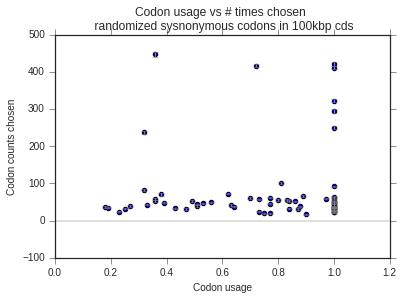

In [26]:
plt.scatter(codon_usage_list, muts_counts_chosen_list)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.errorbar(codon_usage_list, muts_counts_chosen_list, yerr = np.array(muts_counts_chosen_list_sd), ecolor = "grey", ls = "None")
plt.title("Codon usage vs # times chosen \n randomized sysnonymous codons in 100kbp cds")
plt.ylabel("Codon counts chosen")
plt.xlabel("Codon usage")
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M").replace("/", "_").replace(":", "_") 
# plt.savefig("plots/Codon-Usage_{d}_10%Cov_counts.png".format(d=timestamp))

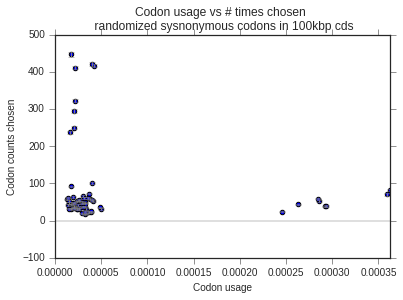

In [27]:
plt.scatter(muts, muts_counts_chosen_list)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.errorbar(muts, muts_counts_chosen_list, yerr = np.array(muts_counts_chosen_list_sd), ecolor = "grey", ls = "None")
plt.title("Codon usage vs # times chosen \n randomized sysnonymous codons in 100kbp cds")
plt.ylabel("Codon counts chosen")
plt.xlabel("Codon usage")
plt.xlim(0, max(muts))
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M").replace("/", "_").replace(":", "_") 
# plt.savefig("plots/Codon-Usage_{d}_10%Cov_mutability_counts.png".format(d=timestamp))